In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,signal
from scipy.optimize import curve_fit
from scipy.special import factorial
from sklearn import preprocessing

# Preparing Higgs Data
higg = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgD = pickle.load(higg)

# Preparing QCD Data
qcd = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcdD = pickle.load(qcd)

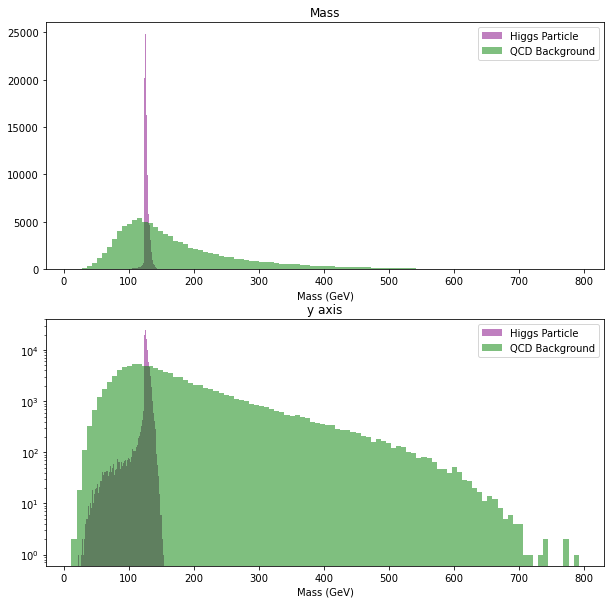

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

for i in range(0,2):
    ax[i].hist(
        higgD['mass'],
        bins=100,
        color='purple',
        alpha=0.5,
        label='Higgs Particle')
    ax[i].hist(
        qcdD['mass'],
        bins=100,
        color='green',
        alpha=0.5,
        label='QCD Background')
    ax[i].legend(loc='upper right')
    ax[i].set_xlabel("Mass (GeV)")

# Graph details that differ between log and non-log scale visualizations
ax[0].set_title("Mass")
ax[1].set_title("y axis")
ax[1].set_yscale('log')

plt.show()

In [13]:
qcdMu = np.mean(qcdD['mass'])
higgsMu = np.mean(higgD['mass'])
mu = ((qcdMu+higgsMu)/2)
x = np.arange(stats.poisson.ppf(0.01, mu=mu),stats.poisson.ppf(0.99, mu=mu))
mu

151.9684818301115

In [14]:
cdf = stats.poisson.cdf(151.96,mu=125)
sig = stats.norm.ppf(cdf)
signif = 50/np.sqrt(2000)
print(f"Best-Fit Significance: {sig}")
print(f"Actual Significance: {signif}")

Best-Fit Significance: 2.3075513973236887
Actual Significance: 1.118033988749895


#### Problem 2

In [26]:
def count_in_threshold(low_lim, high_lim, feature):

    # Start counts at 1 because indexing goes from 0-99999, 
    # which means if we start the count at 0 we will always be one short
    higgs_count=1
    qcd_count=1
    for hval,qval in zip(
        higgD[feature],
        qcdD[feature]):
        if low_lim <= hval <= high_lim:
            higgs_count+=1
        if low_lim <= qval <= high_lim:
            qcd_count+=1
    threshold_details = {
        "low_lim":low_lim,
        "high_lim":high_lim,
        "hc":higgs_count,
        "qc":qcd_count,
        "feature":"feature"
    }
    print_evaluation = True;
    if print_evaluation:
        numerator = 50*(threshold_details['hc']/100000)
        denominator = np.sqrt(2000*(threshold_details['qc']/100000))
        significance = numerator/denominator
         
        print(f"The significance if you use a threshold from {threshold_details['low_lim']}"
          f" to {threshold_details['high_lim']} on the {threshold_details['feature']} feature is: {significance}")
        
xlow = [min(round(higgD['mass'])),100,124]
xhigh = [max(round(higgD['mass'])),150,128]
    
for i in range(0,len(xlow)):
    count_in_threshold(xlow[i], xhigh[i],'mass')

The significance if you use a threshold from 23.0 to 155.0 on the feature feature is: 1.5300467864859666
The significance if you use a threshold from 100 to 150 on the feature feature is: 1.95911751841519
The significance if you use a threshold from 124 to 128 on the feature feature is: 4.164727780077581


#### Problem 3

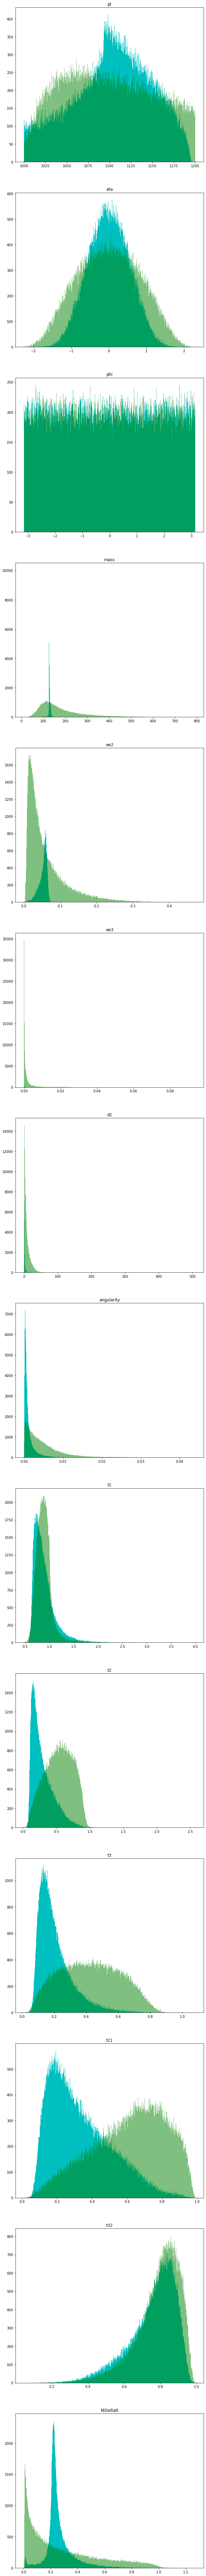

In [39]:
fig,ax=plt.subplots(14, 1, figsize=(10,140))
features_list = ['pt','eta','phi','mass','ee2','ee3','d2','angularity','t1','t2','t3','t21','t32','KtDeltaR']
for i in range(len(features_list)):
    # Creating a histogram of Higgs data
    ax[i].hist(
        higgD[features_list[i]],
        500,
        color = 'c')
    # Creating a histogram of QCD data
    ax[i].hist(
        qcdD[features_list[i]],
        500,
        alpha=.5,
        color = 'g')
    # Setting graph details that are not sensitive to data source
    ax[i].set_title(features_list[i])
    #ax[i].set_xlabel(higgs_qcd_stuff.get(features_list[i]).get('xlabel',""))
    #ax[i].legend(loc='upper right')
    
plt.show() 

In [40]:
def select_indexes(low_lim,high_lim,feature):
    """Must provide a low limit, high limit, and the feature which you are evaluating.
    Returns lists of indexes which are within the threshold"""
    
    indexes = []
    feature_list = list(feature)
    
    for qval in feature_list:
        if low_lim <= qval <= high_lim:
            indexes.append(feature_list.index(qval))
            
    return indexes

In [42]:
qcd_feature = qcdD['mass']
qcd_mass_indexes = select_indexes(124,126,qcd_feature)

h_feature = higgD['mass']
h_mass_indexes = select_indexes(124,126,h_feature)

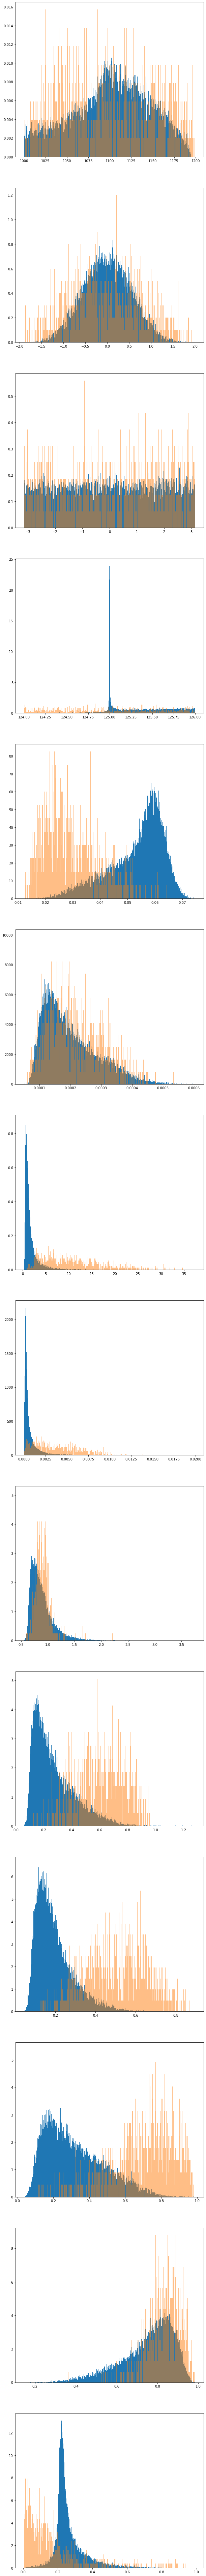

In [46]:
fig,ax=plt.subplots(14, 1, figsize=(10,140))

for i in range(len(features_list)):
    qcd_optimized_mass = []
    for ind in qcd_mass_indexes:
        qcd_optimized_mass.append((qcdD[features_list[i]])[ind])
        
    higgs_optimized_mass = []
    for ind in h_mass_indexes:
        higgs_optimized_mass.append((higgD[features_list[i]])[ind])
        
    # Creating a histogram of QCD data 
    ax[i].hist(
        higgs_optimized_mass,
        500,
        density=True) 
    ax[i].hist(
        qcd_optimized_mass,
        500,
        density=True,
        alpha=.5) 
    # Setting graph details that are not sensitive to data source
    #ax[i].set_title(higgs_qcd_stuff.get(features_list[i]).get('title',''))  
    #ax[i].set_xlabel(higgs_qcd_stuff.get(features_list[i]).get('xlabel',''))
    #ax[i].legend(loc='upper right')
    
plt.show() 

#### problem 4

In [49]:
qcd_angularity_feature = []
for ind in qcd_mass_indexes:
    qcd_angularity_feature.append((qcdD['angularity'])[ind])
        
qcd_t1_feature = []
for ind in qcd_mass_indexes:
    qcd_t1_feature.append((qcdD['t21'])[ind])

higgs_angularity_feature = []
for ind in h_mass_indexes:
    higgs_angularity_feature.append((higgD['angularity'])[ind])
        
higgs_t1_feature = []
for ind in h_mass_indexes:
    higgs_t1_feature.append((higgD['t21'])[ind])

qcd_angularity_indexes = select_indexes(0,.003,qcd_angularity_feature)
qcd_tau_indexes = select_indexes(0,.7,qcd_t1_feature)
h_angularity_indexes = select_indexes(0,.003,higgs_angularity_feature)
h_tau_indexes = select_indexes(0,.7,higgs_t1_feature)

In [50]:
qcd_master_list = []
higgs_master_list = []
qcd_master_list.extend(qcd_mass_indexes)
qcd_master_list.extend(qcd_angularity_indexes)
qcd_master_list.extend(qcd_tau_indexes)
higgs_master_list.extend(h_mass_indexes)
higgs_master_list.extend(h_angularity_indexes)
higgs_master_list.extend(h_tau_indexes)
qcd_unique_indexes = list(set(qcd_master_list))
higgs_unique_indexes = list(set(higgs_master_list))

# Find significance
numerator = 50*(len(higgs_unique_indexes)/100000)
denominator = np.sqrt(2000*(len(qcd_unique_indexes)/100000))
significance = numerator/denominator
         
print(f"The significance after applying ideal thresholds to Mass, Angularity, and Tau21"
        f" subjettiness features is: {significance}")

The significance after applying ideal thresholds to Mass, Angularity, and Tau21 subjettiness features is: 3.708614942122002


NameError: name 'higgs_qcd_stuff' is not defined

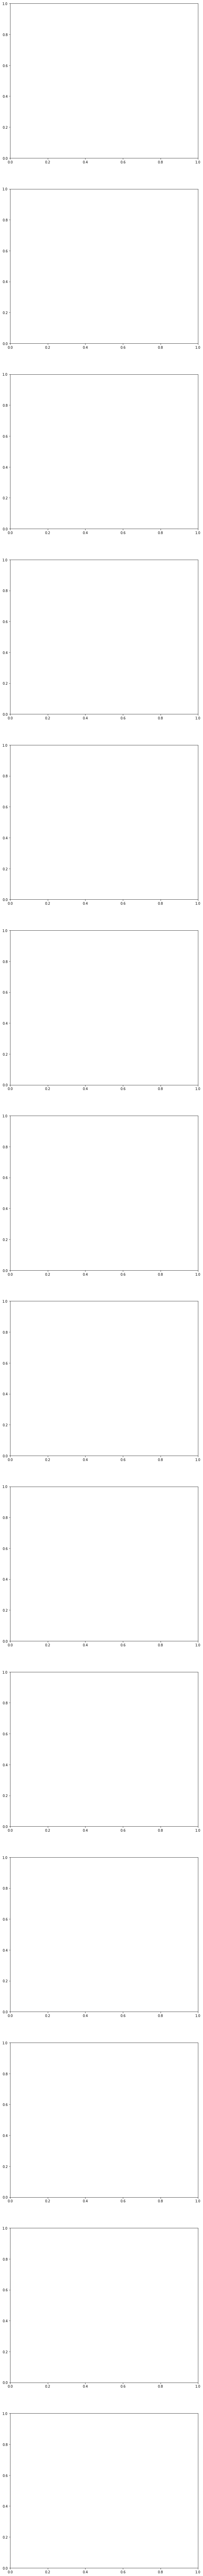

In [51]:
fig,ax=plt.subplots(14, 1, figsize=(10,140))

for i in range(len(features_list)):
    qcd_optimized_fin = []
    for j in qcd_unique_indexes:
        qcd_optimized_fin.append((higgs_qcd_stuff.get(features_list[i]).get('qcd_detail').get('data',""))[j])
        
    higgs_optimized_fin = []
    for ind in higgs_unique_indexes:
        higgs_optimized_fin.append((higgs_qcd_stuff.get(features_list[i]).get('higgs_detail').get('data',""))[ind])
        
    # Creating a histogram of Higgs data 
    ax[i].hist(
        higgs_optimized_fin,
        500,
        density=True) 
    # Creating a histogram of QCD data
    ax[i].hist(
        qcd_optimized_fin,
        500,
        density=True,
        alpha=.5)  
    # Setting graph details that are not sensitive to data source
    #ax[i].set_title(higgs_qcd_stuff.get(features_list[i]).get('title',''))  
    #ax[i].set_xlabel(higgs_qcd_stuff.get(features_list[i]).get('xlabel',''))
    #ax[i].legend(loc='upper right')
    
plt.show() 